# Plot ELG chains
This jupyter notebook contains some code to make plots of the bestfits and contours for the abacus cubic ELG fits to both the mock mean and individual realisations.

In [2]:
# Import some necessary modules
import os
import sys
import pickle
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer     

sys.path.append("../../Barry/")     # Change this so that it points to where you have Barry installed

from barry.samplers import DynestySampler
from barry.samplers import NautilusSampler
from barry.config import setup
from barry.models import PowerBeutler2017, CorrBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4
from barry.datasets.dataset_correlation_function import CorrelationFunction_DESI_KP4
from barry.fitter import Fitter
from barry.models.model import Correction # class for applying corrections to the likelihood function 
from barry.utils import weighted_avg_and_cov # function for getting avg and covariance 

#print(sys.path)
# Read in the fitter class to get all the info on the fit
#pfn = "../plots/desi_kp4_abacus_cubic_ELG/output/desi_kp4_abacus_cubic_ELG.fitter.pkl"
# these are 'broadband_type = poly' 
template_000 = False   
template_003 = True  
phase_shift_free = True 

pfn = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template000/output/desi_kp4_abacus_cubic_ELG-c000_grid003-template000.fitter.pkl"
pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template000/output/"

if template_003:
    pfn = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template003/output/desi_kp4_abacus_cubic_ELG-c000_grid003-template003.fitter.pkl"
    pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template003/output/"

if phase_shift_free:
    pfn = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template000-phaseshift/output/desi_kp4_abacus_cubic_ELG-c000_grid003-template000-phaseshift.fitter.pkl"
    pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template000-phaseshift/output/"

    if template_003:
        pfn = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template003-phaseshift/output/desi_kp4_abacus_cubic_ELG-c000_grid003-template003-phaseshift.fitter.pkl"
        pfn2 = "/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template003-phaseshift/output/"


with open(pfn, 'rb') as pickle_file:
    fitter = pickle.load(pickle_file)
    

This code segment reads in the chains, plots the bestfit model vs. data and prepares stuff for contour plots and summary files

DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Prerecon mock mean 2 mean
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.26264535e-01  3.11163993e+02 -1.06615039e+03  9.37838270e+02
 -2.96827392e+02  3.35422734e+01  6.65035884e+02 -1.32305013e+03
  1.02496898e+03 -3.10223844e+02  3.34061334e+01]
Chi squared/dof is 322.35014603772606/94 at these values


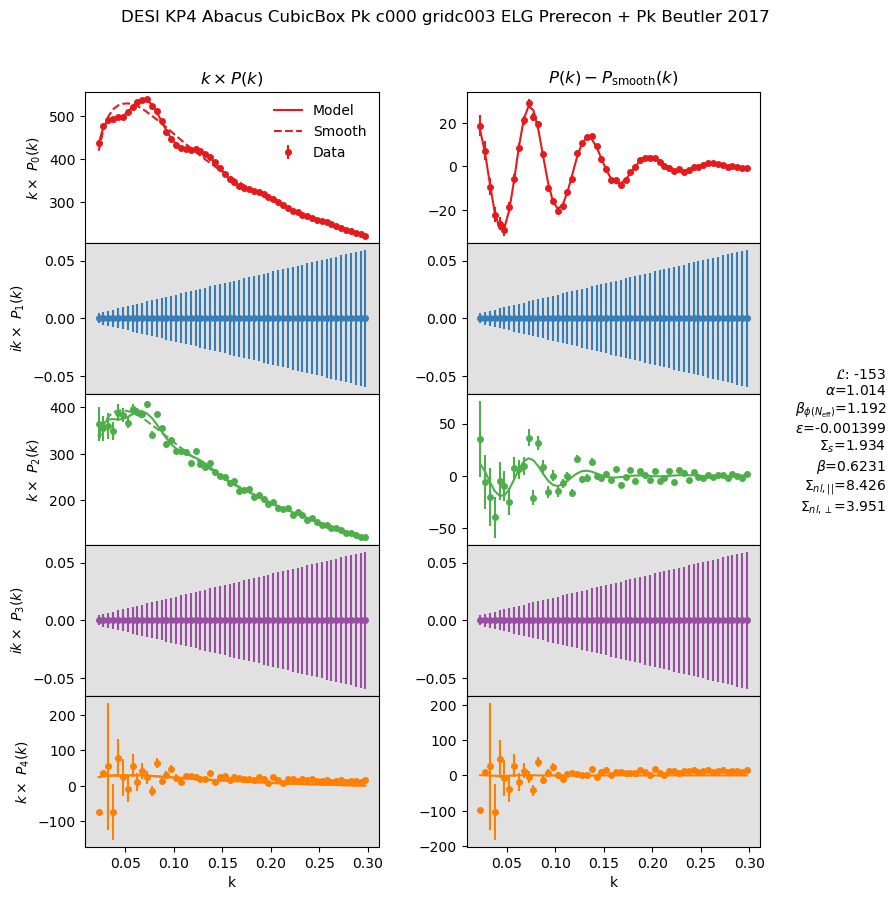

DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Prerecon realisation 0 2 0
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 4.89554040e-01  5.28084352e+02  8.70552153e+02  9.00607223e+01
 -1.88171665e+02  3.29875590e+01  3.46126027e+02  4.35166273e+03
 -2.22687576e+03  3.71054098e+02 -1.66113216e+01]
Chi squared/dof is 1320.6349740448222/94 at these values
DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Prerecon realisation 1 2 1
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 4.93119247e-01 -1.36566503e+02 -6.94321818e+02  7.56783288e+02
 -2.32428871e+02  2.41340794e+01 -8.42742802e+02  3.62714481e+00
  1.68753544e+02  4.09866098e+01 -2.04121686e+01]
Chi squared/dof is 1024.9399930064221/94 at these values
DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Prerecon realisation 2 2 2
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.62471602e-01  2.21481399e+02 -1.11742671e+03  9.41540978e+02
 -2.91111933e+02  3.167

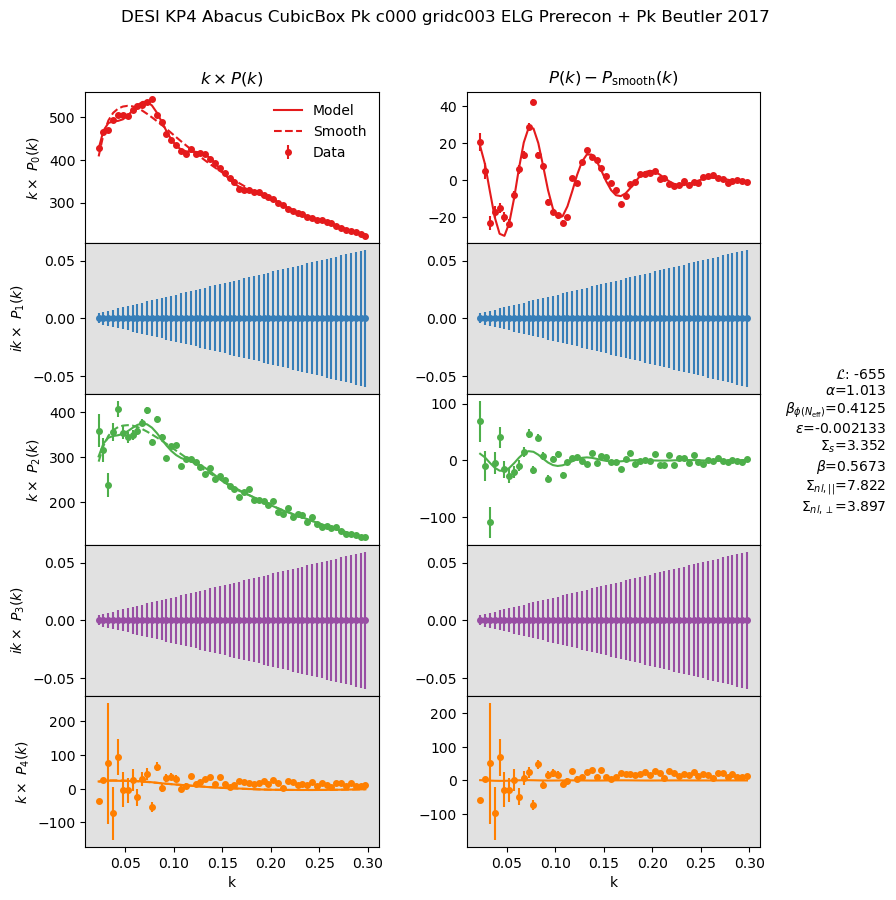

DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Prerecon realisation 11 2 11
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.38260336e-01 -2.15422242e+02 -1.09455828e+03  1.07237336e+03
 -3.57403532e+02  4.20844059e+01  1.84168368e+02 -1.31048671e+03
  9.68381107e+02 -2.83713397e+02  2.99381713e+01]
Chi squared/dof is 1409.4759647852748/94 at these values
DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Prerecon realisation 12 2 12
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.41735640e-01  8.21668407e+00 -1.62628317e+03  1.64162222e+03
 -5.65466151e+02  6.82115096e+01  3.07007421e+02 -2.20498282e+03
  2.02001517e+03 -6.49073706e+02  7.21933375e+01]
Chi squared/dof is 1536.8915187175285/94 at these values
DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Prerecon realisation 13 2 13
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 4.76570626e-01  4.20887978e+02 -7.70744375e+02  9.78919147e+02
 -3.43780311e+02 

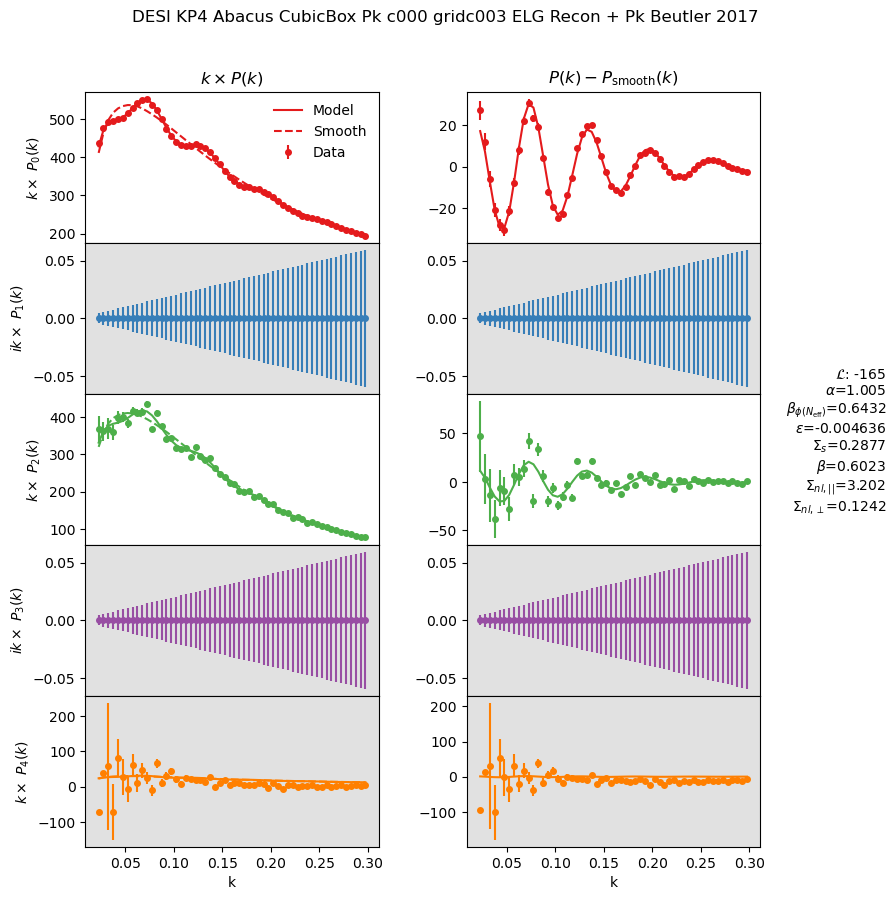

DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Recon realisation 0 3 0
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.13236096e-01  1.33392069e+02  2.32743368e+02 -3.87194899e+02
  1.14987990e+02 -8.46121537e+00  2.47769362e+01  1.92262571e+03
 -2.43621199e+03  8.82896361e+02 -1.04381835e+02]
Chi squared/dof is 1201.0066256233126/94 at these values
DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Recon realisation 1 3 1
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.01098274e-01 -3.19843422e+02  7.15078561e+02 -7.27191438e+02
  2.33179806e+02 -2.36401064e+01 -4.96484546e+02  2.32671548e+03
 -2.77543443e+03  1.03531711e+03 -1.27977332e+02]
Chi squared/dof is 1120.097263899213/94 at these values
DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Recon realisation 2 3 2
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.85782590e-01  8.89500483e+00  2.30477889e+02 -3.42204619e+02
  1.00634791e+02 -7.63494109e+00 

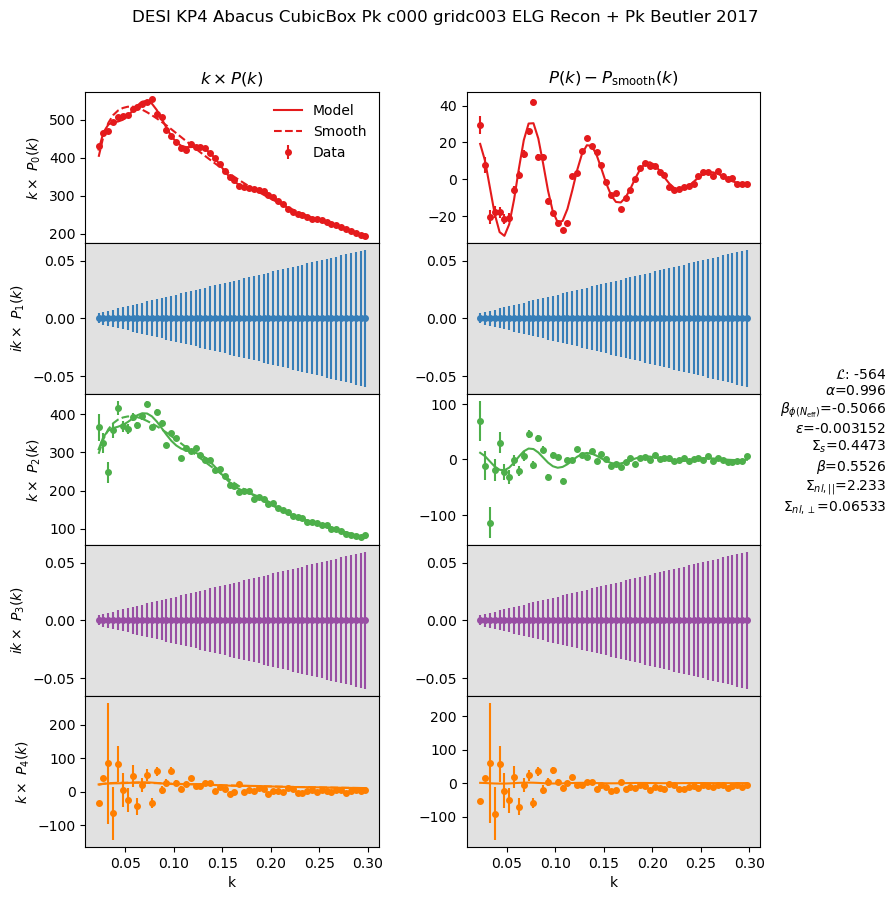

DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Recon realisation 11 3 11
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.08191771e-01 -2.65206925e+02  3.46201241e+02 -3.53702443e+02
  9.16791588e+01 -5.28374420e+00 -3.12120031e+01  6.50298522e+02
 -1.25345377e+03  4.81570855e+02 -5.66669507e+01]
Chi squared/dof is 1376.2817257503852/94 at these values
DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Recon realisation 12 3 12
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 5.27480744e-01 -3.34161751e+02 -4.27128824e+02  3.88751315e+02
 -1.65163033e+02  2.55480016e+01  2.73417241e+02 -6.87620808e+02
 -9.11467316e+01  9.28713682e+01 -1.17312423e+01]
Chi squared/dof is 1216.768665176838/94 at these values
DESI KP4 Abacus CubicBox Pk c000 gridc003 ELG Recon realisation 13 3 13
Maximum likelihood nuisance parameters at maximum a posteriori point are [ 4.62999445e-01 -2.42375597e+02  2.00211153e+02 -2.15749000e+02
  3.78209061e+01  2.3529010

In [3]:
logging.info("Creating plots")

fitname = []
datanames = ["CV_Xi_Prerecon", "CV_Xi_Recon", "CV_Pk_Prerecon", "CV_Pk_Recon"]#, "Pk_Recon"]
datanames = ["Xi_Prerecon", "Xi_Recon", "Pk_Prerecon", "Pk_Recon"]#, "Pk_Recon"]

c = [ChainConsumer(), ChainConsumer(), ChainConsumer(), ChainConsumer()]

# Loop over all the chains
stats = {k: [] for k in datanames}
output = {k: [] for k in datanames}
for posterior, weight, chain, evidence, model, data, extra in fitter.load():

    #print(chain)
    #print(extra)
    #print(extra['name'])
    #print(model.get_labels(), chain.shape)
    # Get the realisation number and redshift bin
    #print(extra['name']) 
    
    #continue 
    CVfile = ''

    if 'Xi' in extra['name']:
        continue
#     if CV:
#         CVfile = 'CV'
        
#     if not CV:
#         if "CV" in extra["name"]:
#            continue
#     else:
#         if "CV" not in extra['name']:
#             continue 
    
    
#     if "Pk" not in extra["name"]:
#        continue
            
#     #print(extra)
        
    recon_bin = 0 if "Prerecon" in extra["name"] else 1
    data_bin = 0 if "Xi" in extra["name"] else 1
    realisation = str(extra["name"].split()[-1]) if "realisation" in extra["name"] else "mean"
    if 'CV' in extra['name']:
        realisation = realisation + ' CV'
    chain_bin = int(2.0 * data_bin + recon_bin)
    print(extra["name"], chain_bin, realisation)
    #print(extra['name'])
    #print(model.get_labels(), chain.shape)
    # Store the chain in a dictionary with parameter names
    df = pd.DataFrame(chain, columns=model.get_labels())
    
    #print(df)
    #print(weight)
    #print(extra)
    
    cols = df.columns.to_numpy()
    #df = df.rename(columns={r'$\beta_{\\phi(N_{\mathrm{eff}})}$' : r'$\beta_{\phi(N_{\mathrm{eff}})}$'})

    # Compute alpha_par and alpha_perp for each point in the chain

    alpha_par, alpha_perp = model.get_alphas(df["$\\alpha$"].to_numpy(), df["$\\epsilon$"].to_numpy())
    df["$\\alpha_\\parallel$"] = alpha_par
    df["$\\alpha_\\perp$"] = alpha_perp

    # Get the MAP (maximum a posteriori) point and set the model up at this point
    #model.broadband_type = "poly" 
    #model.n_poly = (0,2)
    #model.delta = None 
    
    model.set_data(data)
    
    r_s = model.camb.get_data()["r_s"]
    max_post = posterior.argmax()
    params = df.loc[max_post]
    params_dict = model.get_param_dict(chain[max_post])
    #print(params_dict)
    for name, val in params_dict.items():
        model.set_default(name, val)

    # Get some useful properties of the fit, and plot the MAP model against the data if it's the mock mean or realisation 10 (chosen randomly!)
    display = True if realisation == "mean" or realisation == 'mean CV' or realisation == "10" else False
    #print(params_dict)
    new_chi_squared, dof, bband, mods, smooths = model.plot(params_dict, display=display)

    # Add the chain or MAP to the Chainconsumer plots
    extra.pop("realisation", None)
    if realisation == "mean" or realisation == 'mean CV':
        #print(realisation)
        c[chain_bin].add_chain(df, weights=weight, **extra, plot_contour=True, plot_point=False, show_as_1d_prior=False)
        #print(df)
        df_for_file = df
        df['weights'] = weight
        df_for_file.to_csv(pfn2 + extra['name'] +'.csv')
    else:
        c[chain_bin].add_marker(params, **extra, marker_size=80)

    # Compute some summary statistics and add them to a dictionary
    
    params = [
                "$\\alpha_\\parallel$",
                "$\\alpha_\\perp$",
                "$\\Sigma_{nl,||}$",
                "$\\Sigma_{nl,\\perp}$",
                "$\\Sigma_s$"
            ]
    
        
    if phase_shift_free: 
        params.append("$\\beta_{\\phi(N_{\\mathrm{eff}})}$")
    
    mean, cov = weighted_avg_and_cov(
        df[
            params
        ],
        weight,
        axis=0,
    )
    
    # print(params)
    #print(weighted_avg_and_cov(df["$\\beta$"], weight, axis=0)[0])
#     print(weighted_avg_and_cov(df["$\\alpha$"], weight, axis=0)[0])
#     print(weighted_avg_and_cov(df["$\\epsilon$"], weight, axis=0)[0])

#     if 'Prerecon' not in extra['name']:
#         #sigma_s_mean += weighted_avg_and_cov(df["$\\Sigma_s$"], weight, axis=0)[0]
#         count += 1
        
#         beta_mean += weighted_avg_and_cov(df["$\\beta$"], weight, axis=0)[0]
    
#     print(mean)
    #continue
    

        
    if phase_shift_free: ################################### 
        
        corr_alpha_para_perp = cov[1, 0] / np.sqrt(cov[0, 0] * cov[1, 1])
        corr_alpha_para_phase = cov[5, 0] / np.sqrt(cov[5, 5] * cov[0, 0])
        corr_alpha_perp_phase = cov[5, 1] / np.sqrt(cov[5, 5] * cov[1, 1])
        
       
        stats[datanames[chain_bin]].append( # mean alpha_\\, mean alpha_para, stdev alpha\\, stdev alphaperp, corr_alphas, 
            # mean beta, stdev beta, corrs beta and alphas, chisquare, 
            # mean sigma_\\, mean sigma_perp, mean sigma_s 
            [mean[0], mean[1], np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]), 
            corr_alpha_para_perp, mean[5], np.sqrt(cov[5,5]), corr_alpha_para_phase, corr_alpha_perp_phase, new_chi_squared, mean[2], mean[3], mean[4]]
        )

        output[datanames[chain_bin]].append(
            # realisation name, all means of params, stdevs on alphas , corrs alphas, stdev beta, corrs beta/alphas .... other stats 
            f"{realisation:s}, {mean[0]:6.4f}, {mean[1]:6.4f}, {mean[2]:6.4f}, {mean[3]:6.4f}, {mean[4]:6.4f}, {mean[5]:6.4f}, {np.sqrt(cov[0, 0]):6.4f}, {np.sqrt(cov[1, 1]):6.4f}, {corr_alpha_para_perp:7.3f}, {np.sqrt(cov[5, 5]):6.4f}, {corr_alpha_para_phase:7.3f}, {corr_alpha_perp_phase:7.3f}, {r_s:7.3f}, {new_chi_squared:7.3f}, {dof:4d}"
        )
        
        
    else: ###################################
        
        corr = cov[1, 0] / np.sqrt(cov[0, 0] * cov[1, 1])
        
        
        stats[datanames[chain_bin]].append( # mean alpha_\\, mean alpha_para, stdev alpha\\, stdev alphaperp, corr_alphas, chisquare, 
            # mean sigma_\\, mean sigma_perp, mean sigma_s 
            [mean[0], mean[1], np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]), corr, new_chi_squared, mean[2], mean[3], mean[4]]
        )

        output[datanames[chain_bin]].append(
            # realisation name, all means of params, stdevs on alphas .... other stats 
            f"{realisation:s}, {mean[0]:6.4f}, {mean[1]:6.4f}, {mean[2]:6.4f}, {mean[3]:6.4f}, {mean[4]:6.4f}, {np.sqrt(cov[0, 0]):6.4f}, {np.sqrt(cov[1, 1]):6.4f}, {corr:7.3f}, {r_s:7.3f}, {new_chi_squared:7.3f}, {dof:4d}"
        )
        #print('test')
        
# print(beta_mean/count)

Plot the contour plots and output the summary statistics

Pk_Prerecon


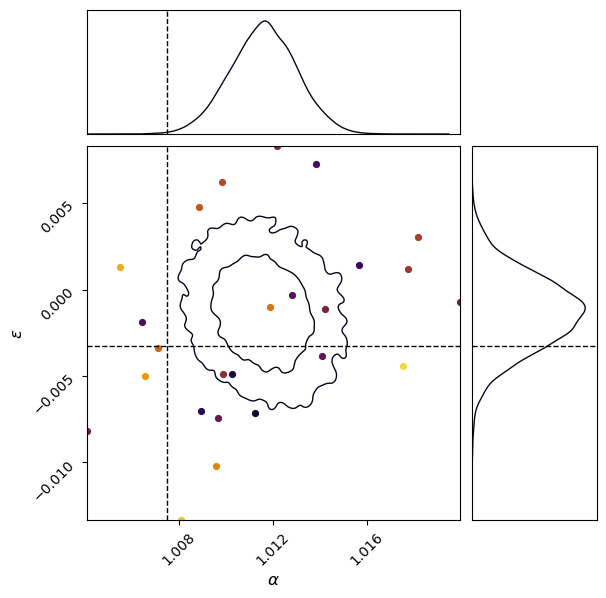

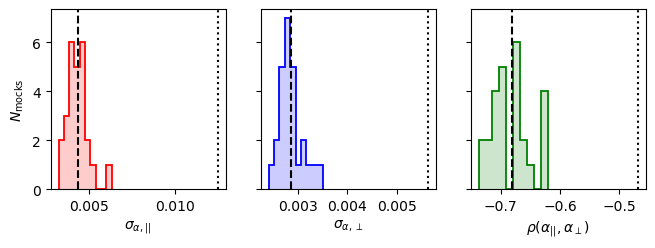

Pk_Recon


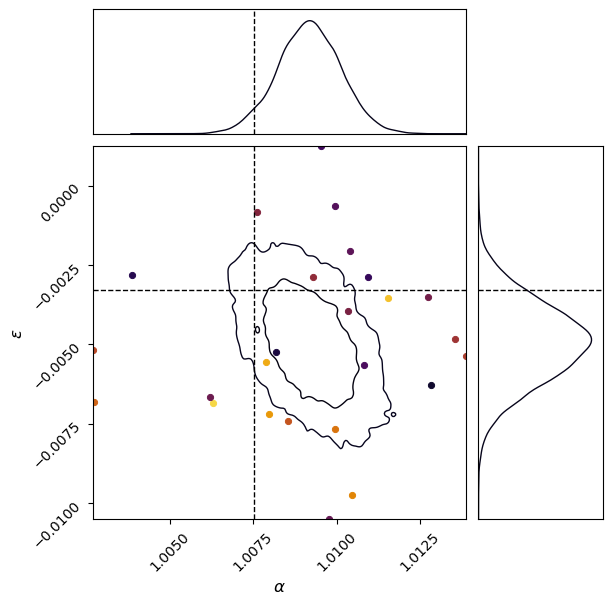

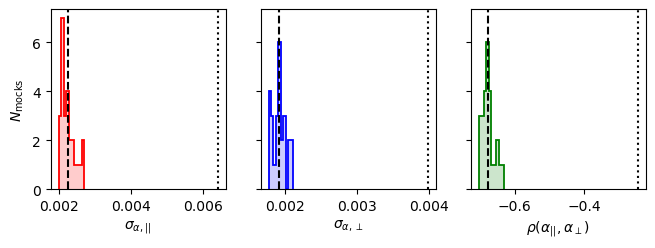

In [3]:
def plot_errors(stats, phase_shift_free=False, suffix=''):
    
    nstats = len(stats)
    means = np.mean(stats, axis=0)
    covs = np.cov(stats, rowvar=False)
    corr = covs[0, 1] / np.sqrt(covs[0, 0] * covs[1, 1])

    labels = [r"$\sigma_{\alpha,||}$", r"$\sigma_{\alpha,\perp}$", r"$\rho(\alpha_{||},\alpha_{\perp})$"] 
    colors = ["r", "b", "g"]
    
    #print(np.array(stats).T.shape)
    
        
    if phase_shift_free: 
        labels.append(r"$\sigma_{\beta}$")
        labels.append(r"$\rho(\alpha_{||},\beta)$")
        labels.append(r"$\rho(\alpha_{\perp},\beta)$")
        colors.append("orange")
        colors.append("grey")
        colors.append("yellow")

    fig, axes = plt.subplots(figsize=(7, 2), nrows=1, ncols=len(labels), sharey=True, squeeze=False)
    if phase_shift_free:
        plt.subplots_adjust(left=0.1, top=0.95, bottom=0.05, right=2.0, hspace=0.3)
    else:
        plt.subplots_adjust(left=0.1, top=0.95, bottom=0.05, right=0.95, hspace=0.3)
    
    range_vals = [2,3,4]
    range_means = [2,3,4]
    stds_arr = [np.sqrt(covs[0, 0]), np.sqrt(covs[1, 1]), corr]
    
    if phase_shift_free: 
        range_vals = [2,3,4,6,7,8] 
        stds_arr = [
                   np.sqrt(covs[0, 0]), 
                   np.sqrt(covs[1, 1]), 
                   corr,
                   np.sqrt(covs[5, 5]),
                   covs[0, 5] / np.sqrt(covs[0, 0] * covs[5, 5]),
                   covs[5, 1] / np.sqrt(covs[5, 5] * covs[1, 1])
                   ]
        range_means = [2,3,4,6,7,8] 
    
    for ax, vals, avgs, stds, l, c in zip(axes.T, np.array(stats).T[range_vals,:], means[range_means], stds_arr, labels, colors):

        ax[0].hist(vals, 10, color=c, histtype="stepfilled", alpha=0.2, density=False, zorder=0)
        ax[0].hist(vals, 10, color=c, histtype="step", alpha=1.0, lw=1.3, density=False, zorder=1)
        ax[0].axvline(avgs, color="k", ls="--", zorder=2)
        ax[0].axvline(stds, color="k", ls=":", zorder=2)
        ax[0].set_xlabel(l)
        
    axes[0, 0].set_ylabel(r"$N_{\mathrm{mocks}}$")

    #plt.savefig("plots/desi_kp4_abacus_cubic_ELG"+suffix+"/output/histplot_v2.png", bbox_inches='tight')
    plt.show()

    return nstats, means, covs, corr

alpha_para, alpha_perp, beta = 0.97912566, 0.98881584, 1.0

if template_003:
    alpha_para, alpha_perp = 1.00093140, 1.01083738
    couplingterm = 1.0/0.22710731766023898
    beta = 3.044/(3.044+couplingterm) / (3.7/(3.7+couplingterm))

    
alpha, eps = model.get_reverse_alphas(alpha_para, alpha_perp)

truth = {"$\\alpha$": alpha, "$\\epsilon$": eps, "$\\alpha_\\perp$": alpha_para, "$\\alpha_\\parallel$": alpha_perp}

if phase_shift_free:
    truth["$\\beta_{\\phi(N_{\\mathrm{eff}})}$"] = beta 

parameters = [names for names in truth]
parameters.append("$\\Sigma_{nl,||}$")
parameters.append("$\\Sigma_{nl,\\perp}$")
parameters.append("$\\Sigma_s$")
parameters.append('$\\beta$')

suffix = ''

if phase_shift_free:
    suffix = '_phaseshiftfree'

for chain_bin in range(len(c)):
    
    # for i in stats[datanames[chain_bin]]:
    #     print(len(i))
    # #if datanames[chain_bin] != 'CV_Pk_Recon':
    #    continue 
    if 'Xi' in datanames[chain_bin]:
        continue 
        
    print(datanames[chain_bin])
    
    #print(dir(c[chain_bin]))
    #print(stats[datanames[chain_bin]])
    
    parameters_used = parameters 
    
    if phase_shift_free: 
        c[chain_bin].plotter.plot(
        truth=truth,
            parameters=(parameters_used[:2]+[parameters_used[4]]),
            #parameters =parameters[2:],
            legend=False,
            display=True,
            figsize=(6,6), 
            #filename="plots/desi_kp4_abacus_cubic_ELG" + suffix + "/output/contourplot_v2" + CVfile + ".png",

        )
    else:
        
        c[chain_bin].plotter.plot(
        truth=truth,
            parameters=(parameters_used[:2]),
            #parameters =parameters[2:],
            legend=False,
            display=True,
            figsize=(6,6), 
            #filename="plots/desi_kp4_abacus_cubic_ELG" + suffix + "/output/contourplot_v2" + CVfile + ".png",

        )
    
    # Plot histograms of the errors and r_off
    nstats, means, covs, corr = plot_errors(stats[datanames[chain_bin]],
                                            phase_shift_free=phase_shift_free,
                                            suffix=suffix)
    

    if phase_shift_free: ###################################
        
        #print(datanames[chain_bin])
        # mean alpha_\\, mean alpha_para, stdev alpha\\, stdev alphaperp, corr_alphas, 
            # mean beta, stdev beta, corrs beta and alphas, chisquare, 
            # mean sigma_\\, mean sigma_perp, mean sigma_s 
        filepath = "plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template000-phaseshift/output/Barry_fit_"
        if template_003:
            filepath = "plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template003-phaseshift/output/Barry_fit_"
       
        with open(filepath + CVfile + datanames[chain_bin] + ".txt", "w") as f:
            
            f.write(
                "# Realisation, alpha_par, alpha_perp, Sigma_nl_par, Sigma_nl_perp, Sigma_s, beta, sigma_alpha_par, sigma_alpha_perp, corr_alpha_par_perp, sigma_beta, corr_beta_alpha_par, corr_beta_alpha_prep, rd_of_template, bf_chi2, dof\n"
                )
                
            for l in output[datanames[chain_bin]]:
                f.write(l + "\n")

            # And now the average of all the individual realisations
            f.write("# ---------------------------------------------------\n")
            f.write(
                "# <alpha_par>, <alpha_perp>, <Sigma_nl_par>, <Sigma_nl_perp>, <phi>, <sigma_alpha_par>, <sigma_alpha_perp>, <sigma_phi>, <corr_alpha_par_perp>, <corr_alpha_par_phi>, <corr_alpha_perp_phi>, std_alpha_par, std_alpha_perp, std_phi, corr_alpha_par_perp, corr_alpha_par_phi, corr_alpha_perp_phi, <bf_chi2>\n"
                )
            f.write(
                f"{means[0]:6.4f}, {means[1]:6.4f}, {means[10]:6.4f}, {means[11]:6.4f}, {means[5]:6.4f}, {means[2]:6.4f}, {means[3]:6.4f}, {means[6]:6.4f}, {means[4]:6.4f}, {means[7]:6.4f}, {means[8]:6.4f}, {np.sqrt(covs[0, 0]):6.4f}, {np.sqrt(covs[1, 1]):6.4f}, {np.sqrt(covs[5, 5]):6.4f}, {corr:6.4f}, {(covs[0, 5] / np.sqrt(covs[0, 0] * covs[5, 5])):6.4f},{(covs[5, 1] / np.sqrt(covs[5, 5] * covs[1, 1])):6.4f}, {means[9]:7.3f}\n"
                )
        
    else:###################################
        
        filepath = "plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template000/output/Barry_fit_"
        if template_003:
            filepath = "plots/desi_kp4_abacus_cubic_ELG-c000_grid003-template003/output/Barry_fit_"
            
        with open(filepath + CVfile + datanames[chain_bin] + ".txt", "w") as f:
            
            
            f.write(# realisation name, all means of params, stdevs on alphas .... other stats 
                "# Realisation, alpha_par, alpha_perp, Sigma_nl_par, Sigma_nl_perp, sigma_alpha_par, sigma_alpha_perp, corr_alpha_par_perp, rd_of_template, bf_chi2, dof\n"
                )
            for l in output[datanames[chain_bin]]:
                f.write(l + "\n")

            # And now the average of all the individual realisations
            f.write("# ---------------------------------------------------\n")
            f.write(
                "# <alpha_par>, <alpha_perp>, <Sigma_nl_par>, <Sigma_nl_perp>, <sigma_alpha_par>, <sigma_alpha_perp>, <corr_alpha_par_perp>, std_alpha_par, std_alpha_perp, corr_alpha_par_perp, <bf_chi2>\n"
                )
            f.write(
                f"{means[0]:6.4f}, {means[1]:6.4f}, {means[6]:6.4f}, {means[7]:6.4f}, {means[2]:6.4f}, {means[3]:6.4f}, {means[4]:6.4f}, {np.sqrt(covs[0, 0]):6.4f}, {np.sqrt(covs[1, 1]):6.4f}, {corr:6.4f}, {means[5]:7.3f}\n"
                )
        